In [1]:
# --- Standard libraries
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# --- RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# --- Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Coronene

#### Load data

In [2]:
# --- Load data from json file into dictionary
with open('raw/data_coronene.json', 'rb') as file:
    dict = json.load(file)

In [3]:
# --- Get the name IDs for all molecules
ids = list(dict[0].keys())
# --- First molecule name ID in list
name = ids[20]
print(name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_1_iEPOXY_2_ieEPOXY_1_2


In [4]:
# --- First item in list is dictionary of mol names and SMILES
print(dict[0][name])

C12[C:2]3=[CH:1][CH:23]4[C:22]5([C:20]16[C:16]1([C:12]78[CH:8]9[C:4]2=[C:6]([CH:5]=[CH:3]3)[CH:7]=[CH:9][C:10]9([OH:25])[CH:11]=[CH:13][C:14]7([CH2:15][CH:17]=[C:18]1[CH:19]=[CH:21]5)[O:24]8)[O:26]6)[O:27]4


In [5]:
# --- Second item is individual atom spectra dictionary of mol name
spec = dict[1][name]
# --- with each key being the atom index
print(spec.keys())

dict_keys(['0', '2', '1', '12', '9', '11', '10', '13', '8', '14', '15', '17', '7', '18', '19', '20', '6', '21', '22', '23', '5', '24', '4', '3'])


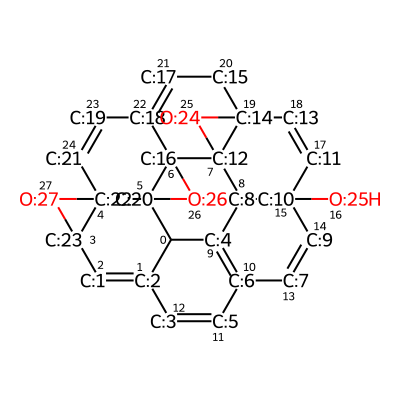

In [6]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# --- Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

<function matplotlib.pyplot.show(close=None, block=None)>

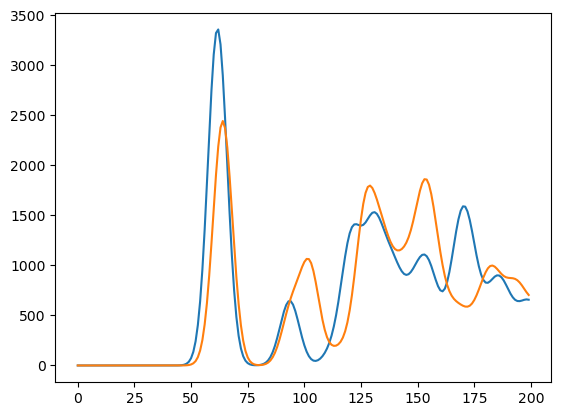

In [7]:
# --- Plot carbons of similar environment
# --- Dictionary numbers correspond to the RDKit atom indexes
plt.plot(dict[1][name]['1'])
plt.plot(dict[1][name]['10'])
#plt.plot(dict[1][name]['23'])
plt.show


In [21]:
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                print(i)
                print(atom.GetIdx())

R_eOH_1_eCOOH__0_eEPOXY_1_eCHO_3_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_0
27


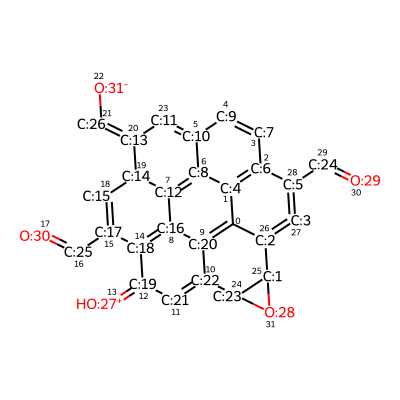

In [22]:
smiles = dict[0]['R_eOH_1_eCOOH__0_eEPOXY_1_eCHO_3_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_0']
mol = Chem.MolFromSmiles(smiles)
mol

#### View data statistics

In [8]:
carbons = 0
# --- Array features (hybridization, number of Hs, aromatic, ring)
features = np.zeros([4, 3, 3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetDegree() == 1:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 0, 0, 0] += 1
                            else:
                                features[0, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 0, 1, 0] += 1
                            else:
                                features[0, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 1, 0, 0] += 1
                            else:
                                features[0, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 1, 1, 0] += 1
                            else:
                                features[0, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 0, 2, 0, 0] += 1
                            else:
                                features[0, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 0, 2, 1, 0] += 1
                            else:
                                features[0, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 0, 0, 0] += 1
                            else:
                                features[0, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 0, 1, 0] += 1
                            else:
                                features[0, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 1, 0, 0] += 1
                            else:
                                features[0, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 1, 1, 0] += 1
                            else:
                                features[0, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 1, 2, 0, 0] += 1
                            else:
                                features[0, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 1, 2, 1, 0] += 1
                            else:
                                features[0, 1, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 2, 0, 0, 0] += 1
                            else:
                                features[0, 2, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 2, 0, 1, 0] += 1
                            else:
                                features[0, 2, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 2, 1, 0, 0] += 1
                            else:
                                features[0, 2, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 2, 1, 1, 0] += 1
                            else:
                                features[0, 2, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[0, 2, 2, 0, 0] += 1
                            else:
                                features[0, 2, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[0, 2, 2, 1, 0] += 1
                            else:
                                features[0, 2, 2, 1, 1] += 1
            elif atom.GetDegree() == 2:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 0, 0, 0] += 1
                            else:
                                features[1, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 0, 1, 0] += 1
                            else:
                                features[1, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 1, 0, 0] += 1
                            else:
                                features[1, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 1, 1, 0] += 1
                            else:
                                features[1, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 0, 2, 0, 0] += 1
                            else:
                                features[1, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 0, 2, 1, 0] += 1
                            else:
                                features[1, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 0, 0, 0] += 1
                            else:
                                features[1, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 0, 1, 0] += 1
                            else:
                                features[1, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 1, 0, 0] += 1
                            else:
                                features[1, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 1, 1, 0] += 1
                            else:
                                features[1, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 1, 2, 0, 0] += 1
                            else:
                                features[1, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 1, 2, 1, 0] += 1
                            else:
                                features[1, 1, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 2, 0, 0, 0] += 1
                            else:
                                features[1, 2, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 2, 0, 1, 0] += 1
                            else:
                                features[1, 2, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 2, 1, 0, 0] += 1
                            else:
                                features[1, 2, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 2, 1, 1, 0] += 1
                            else:
                                features[1, 2, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[1, 2, 2, 0, 0] += 1
                            else:
                                features[1, 2, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[1, 2, 2, 1, 0] += 1
                            else:
                                features[1, 2, 2, 1, 1] += 1
            elif atom.GetDegree() == 3:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 0, 0, 0] += 1
                            else:
                                features[2, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 0, 1, 0] += 1
                            else:
                                features[2, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 1, 0, 0] += 1
                            else:
                                features[2, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 1, 1, 0] += 1
                            else:
                                features[2, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 0, 2, 0, 0] += 1
                            else:
                                features[2, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 0, 2, 1, 0] += 1
                            else:
                                features[2, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 0, 0, 0] += 1
                            else:
                                features[2, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 0, 1, 0] += 1
                            else:
                                features[2, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 1, 0, 0] += 1
                            else:
                                features[2, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 1, 1, 0] += 1
                            else:
                                features[2, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 1, 2, 0, 0] += 1
                            else:
                                features[2, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 1, 2, 1, 0] += 1
                            else:
                                features[2, 1, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 2, 0, 0, 0] += 1
                            else:
                                features[2, 2, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 2, 0, 1, 0] += 1
                            else:
                                features[2, 2, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 2, 1, 0, 0] += 1
                            else:
                                features[2, 2, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 2, 1, 1, 0] += 1
                            else:
                                features[2, 2, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[2, 2, 2, 0, 0] += 1
                            else:
                                features[2, 2, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[2, 2, 2, 1, 0] += 1
                            else:
                                features[2, 2, 2, 1, 1] += 1
            elif atom.GetDegree() == 4:
                if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 0, 0, 0] += 1
                            else:
                                features[3, 0, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 0, 1, 0] += 1
                            else:
                                features[3, 0, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 1, 0, 0] += 1
                            else:
                                features[3, 0, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 1, 1, 0] += 1
                            else:
                                features[3, 0, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 0, 2, 0, 0] += 1
                            else:
                                features[3, 0, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 0, 2, 1, 0] += 1
                            else:
                                features[3, 0, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 0, 0, 0] += 1
                            else:
                                features[3, 1, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 0, 1, 0] += 1
                            else:
                                features[3, 1, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 1, 0, 0] += 1
                            else:
                                features[3, 1, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 1, 1, 0] += 1
                            else:
                                features[3, 1, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 1, 2, 0, 0] += 1
                            else:
                                features[3, 1, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 1, 2, 1, 0] += 1
                            else:
                                features[3, 1, 2, 1, 1] += 1
                elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                    if atom.GetTotalNumHs() == 0:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 2, 0, 0, 0] += 1
                            else:
                                features[3, 2, 0, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 2, 0, 1, 0] += 1
                            else:
                                features[3, 2, 0, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 1:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 2, 1, 0, 0] += 1
                            else:
                                features[3, 2, 1, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 2, 1, 1, 0] += 1
                            else:
                                features[3, 2, 1, 1, 1] += 1
                    elif atom.GetTotalNumHs() == 2:
                        if atom.GetIsAromatic():
                            if atom.IsInRing():
                                features[3, 2, 2, 0, 0] += 1
                            else:
                                features[3, 2, 2, 0, 1] += 1
                        else:
                            if atom.IsInRing():
                                features[3, 2, 2, 1, 0] += 1
                            else:
                                features[3, 2, 2, 1, 1] += 1



In [9]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Degree')
print(f'1 = {np.sum(features[0, :, :, :, :])}')
print(f'2 = {np.sum(features[1, :, :, :, :])}')
print(f'3 = {np.sum(features[2, :, :, :, :])}')
print(f'4 = {np.sum(features[3, :, :, :, :])}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, :, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, :, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, :, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[:, 0, :, :, :])}')
print(f'SP2 = {np.sum(features[:, 1, :, :, :])}')
print(f'SP3 = {np.sum(features[:, 2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, :, 0, :])}')
print(f'False = {np.sum(features[:, :, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, :, 1])}')

Total number of carbons = 7946
---
Degree
1 = 0.0
2 = 2693.0
3 = 4593.0
4 = 660.0
---
Number of hydrogens bonded to carbon:
0 Hs = 4513.0
1 Hs = 3147.0
2 Hs = 286.0
---
Hybridisation of carbon:
SP = 1.0
SP2 = 6257.0
SP3 = 1688.0
---
Numer of aromatic carbons:
True = 3702.0
False = 4244.0
---
Is carbon in a ring:
True = 7656.0
False = 290.0


In [20]:
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0, 0], features[1, 0, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 0, 1, 0], features[1, 0, 0, 1, 1]]],
     headers=['Deg 1 SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0, 0], features[1, 1, 0, 0, 1]],
     ['Non Aromatic', features[1, 1, 0, 1, 0], features[1, 1, 0, 1, 1]]],
     headers=['Deg 1 SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 2, 0, 0, 0], features[1, 2, 0, 0, 1]],
     ['Non Aromatic', features[1, 2, 0, 1, 0], features[1, 2, 0, 1, 1]]],
     headers=['Deg 1 SP3 OH', 'Ring', 'Not Ring']
))

print(tabulate(
    [['Aromatic', features[1, 0, 1, 0, 0], features[1, 0, 1, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 1, 0], features[1, 0, 1, 1, 1]]],
     headers=['Deg 1 SP 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 1, 0, 0], features[1, 1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 1, 0], features[1, 1, 1, 1, 1]]],
     headers=['Deg 1 SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 2, 1, 0, 0], features[1, 2, 1, 0, 1]],
     ['Non Aromatic', features[1, 2, 1, 1, 0], features[1, 2, 1, 1, 1]]],
     headers=['Deg 1 SP3 1H', 'Ring', 'Not Ring']
))


print(tabulate(
    [['Aromatic', features[1, 0, 2, 0, 0], features[1, 0, 2, 0, 1]],
     ['Non Aromatic', features[1, 0, 2, 1, 0], features[1, 0, 2, 1, 1]]],
     headers=['Deg 1 SP 2H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 2, 0, 0], features[1, 1, 2, 0, 1]],
     ['Non Aromatic', features[1, 1, 2, 1, 0], features[1, 1, 2, 1, 1]]],
     headers=['Deg 1 SP2 2H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 2, 2, 0, 0], features[1, 2, 2, 0, 1]],
     ['Non Aromatic', features[1, 2, 2, 1, 0], features[1, 2, 2, 1, 1]]],
     headers=['Deg 1 SP3 2H', 'Ring', 'Not Ring']
))







# print('')
# print(tabulate(
#     [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1]],
#      ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1]]],
#      headers=['SP2 OH', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1]],
#      ['Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1]]],
#      headers=['SP2 1H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 0, 0, 0], features[0, 2, 0, 0, 1]],
#      ['Non Aromatic', features[0, 2, 0, 1, 0], features[0, 2, 0, 1, 1]]],
#      headers=['SP3 0H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 1, 0, 0], features[0, 2, 2, 0, 1]],
#      ['Non Aromatic', features[0, 2, 1, 1, 0], features[0, 0, 1, 1, 1]]],
#      headers=['SP3 1H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 2, 0, 0], features[0, 2, 2, 0, 1]],
#      ['Non Aromatic', features[0, 2, 2, 1, 0], features[0, 2, 2, 1, 1]]],
#      headers=['SP3 2H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 1, 0, 0, 0], features[0, 1, 0, 0, 1]],
#      ['Non Aromatic', features[0, 1, 0, 1, 0], features[0, 1, 0, 1, 1]]],
#      headers=['SP2 OH', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 1, 1, 0, 0], features[0, 1, 1, 0, 1]],
#      ['Non Aromatic', features[0, 1, 1, 1, 0], features[0, 1, 1, 1, 1]]],
#      headers=['SP2 1H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 0, 0, 0], features[0, 2, 0, 0, 1]],
#      ['Non Aromatic', features[0, 2, 0, 1, 0], features[0, 2, 0, 1, 1]]],
#      headers=['SP3 0H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 1, 0, 0], features[0, 2, 2, 0, 1]],
#      ['Non Aromatic', features[0, 2, 1, 1, 0], features[0, 0, 1, 1, 1]]],
#      headers=['SP3 1H', 'Ring', 'Not Ring']
# ))
# print('')
# print(tabulate(
#     [['Aromatic', features[0, 2, 2, 0, 0], features[0, 2, 2, 0, 1]],
#      ['Non Aromatic', features[0, 2, 2, 1, 0], features[0, 2, 2, 1, 1]]],
#      headers=['SP3 2H', 'Ring', 'Not Ring']
# ))

Deg 1 SP OH      Ring    Not Ring
-------------  ------  ----------
Aromatic            0           0
Non Aromatic        1           0

Deg 1 SP2 OH      Ring    Not Ring
--------------  ------  ----------
Aromatic             1           0
Non Aromatic         0           0

Deg 1 SP3 OH      Ring    Not Ring
--------------  ------  ----------
Aromatic             0           0
Non Aromatic         0           0
Deg 1 SP 1H      Ring    Not Ring
-------------  ------  ----------
Aromatic            0           0
Non Aromatic        0           0

Deg 1 SP2 1H      Ring    Not Ring
--------------  ------  ----------
Aromatic          1086           0
Non Aromatic      1201         118

Deg 1 SP3 1H      Ring    Not Ring
--------------  ------  ----------
Aromatic             0           0
Non Aromatic         0           0
Deg 1 SP 2H      Ring    Not Ring
-------------  ------  ----------
Aromatic            0           0
Non Aromatic        0           0

Deg 1 SP2 2H      Ring    N

In [11]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # --- Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # --- Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [12]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11959
---
Number of types of bond:
Single = 6152.0
Double = 1584.0
Aromatic = 4223.0
---
Is bond conjugated:
True = 7419.0
False = 4540.0
---
Is bond in a ring:
True = 10596.0
False = 1363.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1054         671
Non Conjugated    4197         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1046         425
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4223           0
Non Conjugated       0           0


In [13]:
import collections

test_dict = collections.defaultdict(list)

for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    # --- Search through all atoms in molecule
    for atom in mol.GetAtoms():
        # --- Identify all carbons in molecule
        if atom.GetAtomicNum() == 6:
            # --- Look at the neighbouring atoms of carbon
            c_neigh = atom.GetNeighbors()
            # --- Identify carbons bonded to an oxygen
            for cn in c_neigh:
                if cn.GetAtomicNum() == 8:
                    # --- Get neighbours of the oxygen
                    o_neigh = cn.GetNeighbors()
                    # --- Look through O neighbours and identify if bonded to H
                    for on in o_neigh:
                        if on.GetAtomicNum() == 1:
                            test_dict[i].append(atom.GetIdx())
    

### Circumcoronene

#### Load Data

In [24]:
# --- Load data from json file into dictionary
with open('raw/data_circumcoronene.json', 'rb') as file:
    dict = json.load(file)

In [25]:
# --- Get the name IDs for all molecules
ids = list(dict[0].keys())
# --- First molecule name ID in list
name = 'cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2'
print(name)

cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2


In [26]:
# --- First item in list is dictionary of mol names and SMILES
print(dict[0][name])

c12[c:1]3[c:2]4[c:3]([cH:4][cH:5]1)[cH:38][c:39]1[c:40]5[c:9]4[c:8]4[c:7]6[c:6]3[c:24]3[c:23]([cH:31][c:32]([CH:56]=[O:60])[c:33]7[c:25]3[c:26]3[c:10]6[c:11]6[c:12]8[c:13]4[c:42]4[c:41]5[c:49]([cH:48][cH:47]1)[cH:50][c:51]1[c:43]4[c:44]4[c:17]8[c:16]5[c:15]8[c:14]6[c:28]6[c:27]3[C:35]([CH:55]=[O:59])([CH2:34]7)[CH:36]=[C:37]([C:54](=[O:57])[OH:58])[c:29]6[cH:30][c:18]8[cH:19][cH:20][c:21]5[CH2:46][c:45]4[cH:53][cH:52]1)[CH2:22]2


In [27]:
# --- Second item is individual atom spectra dictionary of mol name
spec = dict[1][name]
# --- with each key being the atom index
print(spec.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '12', '11', '10', '9', '22', '23', '24', '25', '38', '37', '36', '35', '52', '53', '54', '55', '60', '14', '13', '20', '21', '40', '39', '50', '51', '15', '16', '19', '44', '41', '45', '46', '6', '7', '8', '27', '26', '33', '34', '57', '56', '30', '29', '28', '31', '32', '59', '58', '47', '42', '17'])


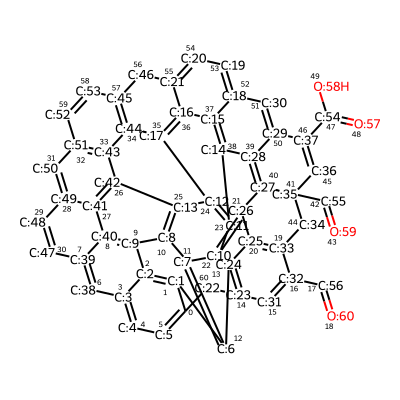

In [28]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# --- Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

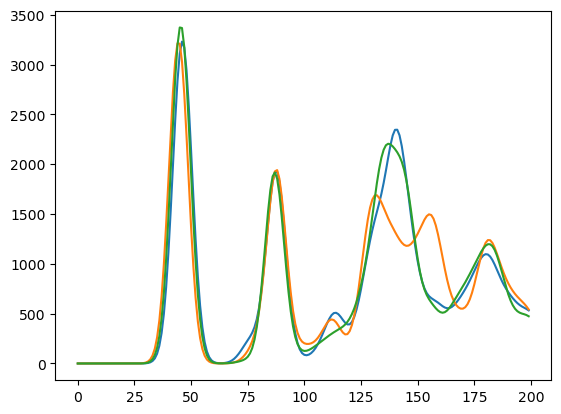

In [30]:
# --- Plot the spectra with the old dictionary keys
# --- which correspond to the atom map number C#
plt.plot(spec['29'])
plt.plot(spec['31'])
plt.plot(spec['59'])
plt.show()

#### View data statistics

In [62]:
carbons = 0
features = np.zeros([3, 3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 0, 0, 0] += 1
                        else:
                            features[0, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 0, 1, 0] += 1
                        else:
                            features[0, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 1, 0, 0] += 1
                        else:
                            features[0, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 1, 1, 0] += 1
                        else:
                            features[0, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 2, 0, 0] += 1
                        else:
                            features[0, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 2, 1, 0] += 1
                        else:
                            features[0, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 0, 0, 0] += 1
                        else:
                            features[1, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 0, 1, 0] += 1
                        else:
                            features[1, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 1, 0, 0] += 1
                        else:
                            features[1, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 1, 1, 0] += 1
                        else:
                            features[1, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 2, 0, 0] += 1
                        else:
                            features[1, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 2, 1, 0] += 1
                        else:
                            features[1, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 0, 0, 0] += 1
                        else:
                            features[2, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 0, 1, 0] += 1
                        else:
                            features[2, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 1, 0, 0] += 1
                        else:
                            features[2, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 1, 1, 0] += 1
                        else:
                            features[2, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 2, 0, 0] += 1
                        else:
                            features[2, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 2, 1, 0] += 1
                        else:
                            features[2, 2, 1, 1] += 1

In [63]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[0, :, :, :])}')
print(f'SP2 = {np.sum(features[1, :, :, :])}')
print(f'SP3 = {np.sum(features[2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, 0, :])}')
print(f'False = {np.sum(features[:, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, 1])}')
print('')
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0], features[0, 0, 0, 1]],
     ['Non Aromatic', features[0, 0, 1, 0], features[0, 0, 1, 1]]],
     headers=['SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0], features[1, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 0], features[1, 0, 1, 1]]],
     headers=['SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0], features[1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 0], features[1, 1, 1, 1]]],
     headers=['SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0], features[2, 0, 0, 1]],
     ['Non Aromatic', features[2, 0, 1, 0], features[2, 0, 1, 1]]],
     headers=['SP3 0H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 1, 1, 0], features[2, 1, 1, 1]]],
     headers=['SP3 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 2, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 2, 1, 0], features[2, 2, 1, 1]]],
     headers=['SP3 2H', 'Ring', 'Not Ring']
))

Total number of carbons = 5035
---
Number of hydrogens bonded to carbon:
0 Hs = 3512.0
1 Hs = 1436.0
2 Hs = 87.0
---
Hybridisation of carbon:
SP = 0.0
SP2 = 4601.0
SP3 = 434.0
---
Numer of aromatic carbons:
True = 3962.0
False = 1073.0
---
Is carbon in a ring:
True = 4914.0
False = 121.0

SP OH           Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic       0           0

SP2 OH          Ring    Not Ring
------------  ------  ----------
Aromatic        3029           0
Non Aromatic     224          70

SP2 1H          Ring    Not Ring
------------  ------  ----------
Aromatic         933           0
Non Aromatic     294          51

SP3 0H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     189           0

SP3 1H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     158           0

SP3 2H          Ring    Not Ring
------------

In [64]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# --- Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # --- Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # --- Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [65]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 7265
---
Number of types of bond:
Single = 1714.0
Double = 474.0
Aromatic = 5077.0
---
Is bond conjugated:
True = 6048.0
False = 1217.0
---
Is bond in a ring:
True = 6828.0
False = 437.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         296         208
Non Conjugated    1158          52
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         295         172
Non Conjugated       2           5
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        5077           0
Non Conjugated       0           0
